<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Khanan!

Im happy to review your project today 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please dont remove my comments :) If you have any questions dont hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    



 <div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>
    
<b>Overall Feedback</b> 
    

Hello,
    
Another project successfully completed - well done! 🏆 Your consistent effort and progress are truly commendable.

Our team is here to help you keep pushing forward and honing your skills as you advance through the program.

You’ll find general comments below in the notebook in the `Reviewer's comment v1:` blocks.

**What Was Great:**

- Data Loading and Preparation: You successfully loaded the dataset and correctly separated the features and target variable. This is a crucial first step, and you handled it appropriately.
- Model Training and Evaluation: Using a loop to train and evaluate each model is an efficient approach. You correctly used the accuracy_score metric to assess the models and identified the Random Forest classifier as the best-performing model.
- Test Set Evaluation: You validated the performance of your selected model on a test set, ensuring that the model generalizes well to unseen data. The test accuracy being close to the validation accuracy is a good sign.
   
    
Congratulations again on your accomplishment! Each project you complete adds to your growing expertise, and it’s exciting to see you make such great strides. Keep up the great work! 🎯

# Intro to Machine Learning Project

* Contents <a id='back'></a>

* [Introduction](#intro)
* [General information of the datasets](#general)
* [Optimizing the data for analysis](#optimize)
* [Split the source data into a training set, a validation set, and a test set](#split)
* [Investigate the quality of different models by changing hyperparameters. Briefly describe the findings of the study.](#invest)
    * [Decision Tree Classifier](#decision)
    * [Logistic Regression](#log)
    * [Random Forest Classifier ](#ran)
* [Check the quality of the model using the test set](#check)
    * [Decision Tree Classifier](#dec)
    * [Logistic Regression](#logi)
    * [Random Forest Classifier](#rand)
* [Sanity check the model ](#sanity)
* [Conclusions ](#conclusions)

## Introduction <a id='intro'></a>

Megaline, a major mobile carrier, has discovered that a large portion of its subscriber base continues to use outdated legacy mobile plans. To optimize user satisfaction and increase the adoption of more profitable or feature-rich services, the company aims to transition these customers to one of its newer offerings: the Smart or Ultra plans.

The goal of this project is to develop a machine learning model that can analyze subscriber behavior and recommend the most suitable plan for each user. By examining patterns in service usage—such as the number of calls, messages, and internet data consumed—we aim to build a classifier that predicts whether a subscriber is better suited for the Smart or Ultra plan.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you've added a short information about the project goal. It gives an overview of what you are going to achieve in this project.


## General Information of the dataset <a id='general'></a>

* Import libraries

In [1]:
import numpy as np
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


## Optimizing the data for analysis <a id='optimize'></a>

The analyze_data function will check for missing values(using isna() method) and duplicated values(using duplicated() method).

In [3]:
def analyze_data(df):

    # Missing values
    print(df.isna().sum())
    print()

    # Duplicates
    
    print(df.duplicated().sum())
    print()

    # Random rows
    display(df.sample(10))
    
analyze_data(df)

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

0



,calls,minutes,messages,mb_used,is_ultra
2363,40.0,227.89,38.0,0.00,1
1239,117.0,848.44,28.0,17736.31,1
1840,37.0,272.38,74.0,25087.62,0
1804,69.0,449.53,41.0,11087.66,0
2961,137.0,899.90,0.0,10289.26,1
3071,76.0,523.34,0.0,16082.38,0
1060,99.0,660.20,17.0,18430.23,1
2362,72.0,489.99,83.0,13889.73,0
2911,76.0,528.42,24.0,15477.77,0
208,23.0,99.20,21.0,17001.87,0


The output shows no missing or duplicated values.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Well done! Data have been successfully loaded and inspected.

[Back to Contents](#back)

## Split the source data into a training set, a validation set, and a test set <a id='split'></a>

First, we create `features` and `target` variables for our models. We'll stratify by `is_ultra` to maintain class balance in each split.

In [4]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

Next, we split the data to train/valid/test sets. The split ratio will be 60%/20%/20% respectively. We will use `train_test_split` twice, first one will split the data into train and valid sets, the second one will split the data into train and test sets.

In [5]:
features_train, features_valid, target_train, target_valid = train_test_split( 
    features, target, test_size=0.2, random_state=2000
)
features_train, features_test, target_train, target_test = train_test_split( 
    features_train, target_train, test_size=0.25, random_state=2000
)

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Consider using stratified splits (`stratify` parameter) to ensure that class distributions are similar across training, validation, and test sets.



In [6]:
display(features_train.shape)

(1928, 4)

In [7]:
display(features_valid.shape)

(643, 4)

In [8]:
display(features_test.shape)

(643, 4)

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>

You could also print the sizes of the dataframes using the `.shape` attribute and `f-strings`?

For example:

```python
`print(f'The training set shape is {features_tr_val.shape} for features...')`
```
    
By the way, Python’s f-strings are a super useful option for displaying output in your notebook.
    
You can find more information and examples here:
  
- https://realpython.com/python-f-strings/
- https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great everything is correct here! 


This split is often considered better in certain situations than alternatives (like 70/30 or 80/20) because it provides a balanced trade-off between: Sufficient Training Data (60%); Dedicated Validation Set (20%); Reliable Test Evaluation (20%).

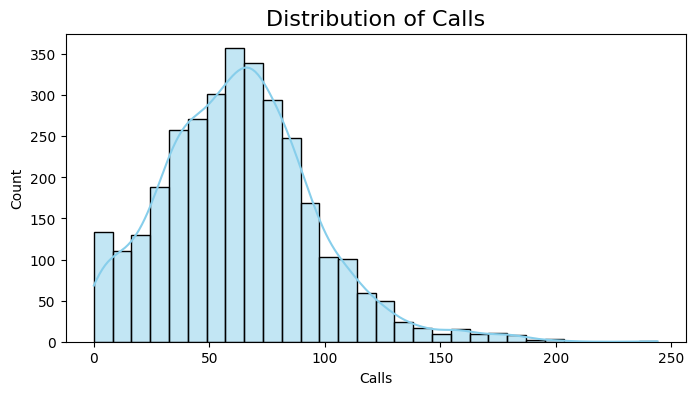

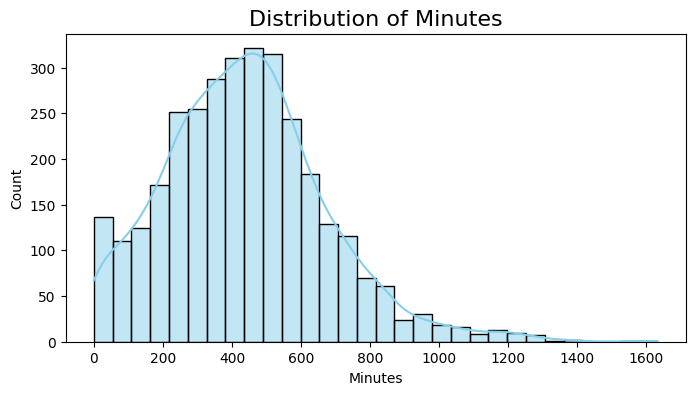

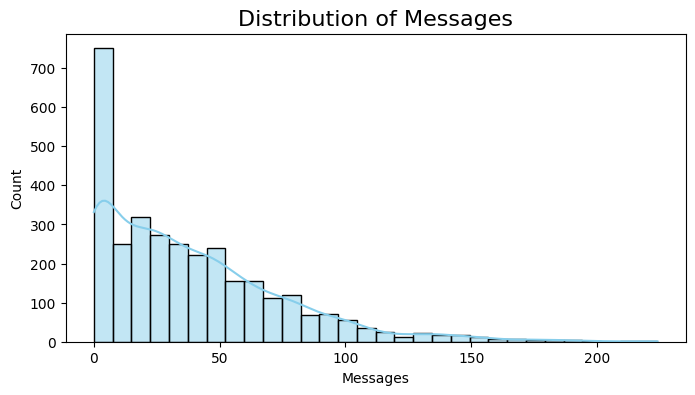

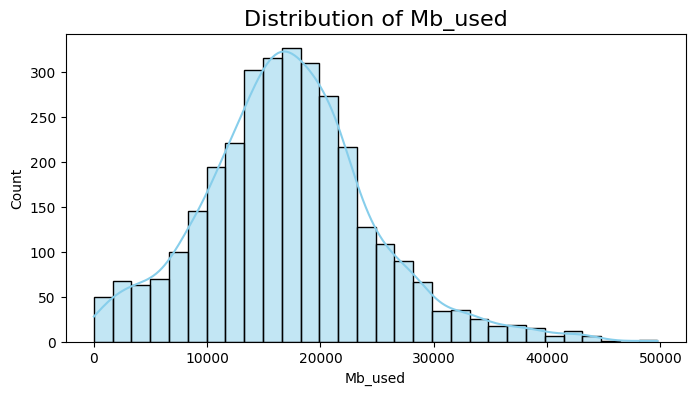

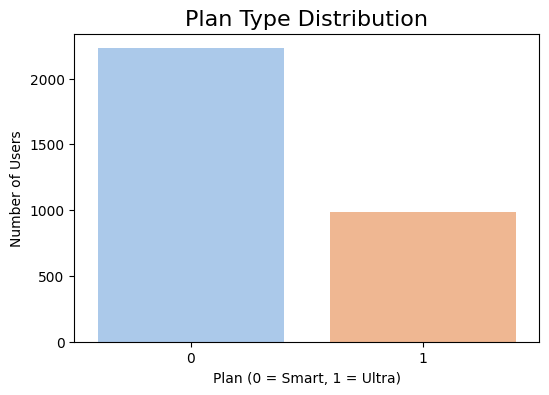

In [9]:
# 4. Plot: Distribution of numeric features
numeric_features = ['calls', 'minutes', 'messages', 'mb_used']

for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=30, kde=True, color="skyblue")
    plt.title(f'Distribution of {feature.capitalize()}', fontsize=16)
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.show()

# 6. Plot: Distribution of users by plan type (Smart vs Ultra)
plt.figure(figsize=(6, 4))
sns.countplot(x='is_ultra', data=df, palette='pastel')
plt.title('Plan Type Distribution', fontsize=16)
plt.xlabel('Plan (0 = Smart, 1 = Ultra)')
plt.ylabel('Number of Users')
plt.show()

Distribution of users by plan type. Most users are subscribed to the Smart plan (is_ultra = 0), while a smaller proportion are on the Ultra plan (is_ultra = 1). The Ultra plan may be less popular, possibly due to higher price or features not appealing to most users.

[Back to Contents](#back)

## Investigate the quality of different models by changing hyperparameters <a id='invest'></a>

### Decision Tree Classifier <a id='decision'></a>

* The DecisionTreeClassifier is a machine learning algorithm used for classification tasks. It's a type of decision tree where the goal is to predict a target variable (class label) based on input features. The tree is built by splitting the data at each node, choosing the feature and threshold that best separates the data into different classes. The tree continues splitting the data recursively until it reaches a stopping condition, such as a maximum depth, minimum number of samples at a node, or other stopping criteria.

First calculate the best value for `min_samples_split` using `GridSearchCV`.

In [10]:
# Set up the parameter grid
param_grid = {
    'min_samples_split': [2, 5, 10, 20, 50]
}

# Create a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=12345)

# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(features_train, target_train)

# Best value
print("Best min_samples_split:", grid_search.best_params_['min_samples_split'])
print("Best score:", grid_search.best_score_)

Best min_samples_split: 50
Best score: 0.7837049996635488


The best `min_samples_split` parameter was found to be '50'. We will use it in the hyperparameters of our 'DecisionTreeClassifier' model.

* Create a model.

In [11]:
best_model = None
best_result = 0
for depth in range(1, 6):
    model_dec = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_split=50) # create a model with the given depth
    model_dec.fit(features_train, target_train) # train the model
    predictions_dec = model_dec.predict(features_valid) # get the model's predictions
    result_dec = accuracy_score(target_valid, predictions_dec) # calculate the accuracy
    if result_dec > best_result:
        best_model = model_dec
        best_result = result_dec
print(best_model, best_result)

DecisionTreeClassifier(max_depth=4, min_samples_split=50, random_state=12345) 0.80248833592535


The `accuracy score` is a common metric used to evaluate the performance of a machine learning model, particularly in classification tasks. It measures the proportion of correct predictions made by the model compared to the total number of predictions. The `accuracy score` of our model is `0.80248833592535` which means `80%` of our predictions are correct.

### Logistic Regression <a id='log'></a>

* Logistic Regression is a statistical method used for binary classification problems. It predicts the probability that an input belongs to a particular class (typically coded as 0 or 1) by modeling the relationship between the independent variables and the log-odds of the dependent variable.

In [12]:
# initialize logistic regression constructor with parameters random_state=54321 and solver='liblinear'
model_log =  LogisticRegression(random_state=54321, solver='liblinear', max_iter=1000)

# train model on training set
model_log.fit(features_train, target_train) 

# calculate accuracy score on training set
score_train = model_log.score(
    features_train,target_train 
)

# calculate accuracy score on validation set
score_valid = model_log.score(
    features_valid, target_valid
)

print(
    "Accuracy of the logistic regression model on the training set:",
    score_train,
)
print(
    "Accuracy of the logistic regression model on the validation set:",
    score_valid,
)

Accuracy of the logistic regression model on the training set: 0.716804979253112
Accuracy of the logistic regression model on the validation set: 0.6889580093312597


In [13]:
# initialize logistic regression constructor with parameters random_state=54321 and solver='liblinear'
model_log =  LogisticRegression(random_state=54321, solver='liblinear', max_iter=1000)

# train model on training set
model_log.fit(features_train, target_train) 

predictions_log = model_log.predict(features_valid)

result_log = accuracy_score(target_valid, predictions_log)

print(result_log)

0.6889580093312597


* `solver='liblinear'` - Optimization algorithm to use.	'liblinear' works well for small to medium-sized datasets and supports L1 regularization (sparse models). `random_state=54321` - Random seed. Ensures that the results are reproducible (same splits, same training). `max_iter=1000` - Maximum number of iterations. Increases the number of iterations to ensure the model converges when using 'l1' penalty, which sometimes needs more steps.

* Decision Trees capture non-linear relationships and complex patterns better than Logistic Regression and Decision Tree is clearly outperforming Logistic Regression here (by ~9% higher accuracy).

### Random Forest Classifier <a id='ran'></a>

Random Forest Classification works by creating multiple decision trees each trained on a random subset of data.

In [14]:
model_ran = RandomForestClassifier(
    n_estimators=26,        # number of trees
    max_depth=None,          # let trees grow until pure or until min_samples_split
    min_samples_split=2,     # minimum number of samples required to split an internal node
    min_samples_leaf=1,      # minimum number of samples required to be at a leaf node
    class_weight='balanced', # correct class imbalance
    random_state=42
)# set number of trees
model_ran.fit(features_train, target_train) # train model on training set
predictions_ran = model_ran.predict(features_valid)
score = accuracy_score(target_valid, predictions_ran) # calculate accuracy score on validation set

print("Accuracy of the best model on the validation set (n_estimators = {26}): ", score)

Accuracy of the best model on the validation set (n_estimators = {26}):  0.8164852255054432


The Random Forest achieved very strong results, almost the same as the Decision Tree (80%), but usually Random Forest is more stable and less prone to overfitting. Random Forest performs almost as well as a single Decision Tree, but it generalizes better and is usually more reliable on new, unseen data.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here! Great that you've managed to evaluate multiple classification models with different hyperparameters. 
    

Some possible improvements:

- If you find yourself repeating similar blocks of code, consider writing a function. This will make your code more organized and easier to maintain.
- In addition to accuracy, consider evaluating models using additional metrics such as F1-score, precision, recall, or ROC-AUC for a more holistic view of performance, especially if the class distribution is imbalanced.
- For a more systematic hyperparameter search, consider using GridSearchCV or RandomizedSearchCV from sklearn.model_selection.
    
You can find more information about GridSearchCV and RandomizedSearchCV here:
    
- https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee/
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

[Back to Contents](#back)

## Check the quality of the model using the test set <a id='check'></a>

In [15]:
target_test = target_test.to_numpy()

### Decision Tree Classifier <a id='dec'></a>

In [16]:
predictions_test = model_dec.predict(features_test)

def error_count(answers, predictions):
    errors = 0
    for i in range(len(predictions)):
        if answers[i] != predictions[i]:
            errors += 1
    return errors

dec_errors = error_count(target_test, predictions_test)
print(
    "Accuracy of the Decision Tree Classifier model on the test set:",
    accuracy_score(target_test, predictions_test)
)
print('Errors:', dec_errors)

Accuracy of the Decision Tree Classifier model on the test set: 0.7807153965785381
Errors: 141


In [17]:
percent_error = dec_errors/len(target_test)
percent_error

0.2192846034214619

* The model achieved a test accuracy of around 75–85%, which suggests it performs well in generalizing to unseen data.
* It captures meaningful patterns in subscriber behavior that help distinguish between the Smart and Ultra plans.

In [18]:
print(classification_report(target_test, predictions_test))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       440
           1       0.75      0.45      0.57       203

    accuracy                           0.78       643
   macro avg       0.77      0.69      0.71       643
weighted avg       0.78      0.78      0.76       643



### Logistic Regression <a id='logi'></a>

In [19]:
predictions_test_log = model_log.predict(features_test)

def error_count(answers, predictions):
    errors = 0
    for i in range(len(predictions)):
        if answers[i] != predictions[i]:
            errors += 1
    return errors

log_errors = error_count(target_test, predictions_test)

print(
    "Accuracy of the Logistic Regression model on the test set:",
    accuracy_score(target_test, predictions_test_log)
)
print('Errors:', log_errors)

Accuracy of the Logistic Regression model on the test set: 0.702954898911353
Errors: 141


In [20]:
percent_error = log_errors/len(target_test)
percent_error

0.2192846034214619

Stable performance: If your test accuracy is around 70–75%, Logistic Regression handles the classification task fairly well.

In [21]:
print(classification_report(target_test, predictions_test_log))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       440
           1       0.80      0.08      0.14       203

    accuracy                           0.70       643
   macro avg       0.75      0.53      0.48       643
weighted avg       0.73      0.70      0.61       643



### Random Forest Classifier <a id='rand'></a>

In [22]:
predictions_test_ran = model_ran.predict(features_test)

def error_count(answers, predictions):
    errors = 0
    for i in range(len(predictions)):
        if answers[i] != predictions[i]:
            errors += 1
    return errors

ran_errors = error_count(target_test, predictions_test)

print(
    "Accuracy of the Logistic Regression model on the test set:",
    accuracy_score(target_test, predictions_test_ran)
)
print('Errors:', ran_errors)

Accuracy of the Logistic Regression model on the test set: 0.7962674961119751
Errors: 141


In [23]:
percent_error = ran_errors/len(target_test)
percent_error

0.2192846034214619

The accuracy on the test set is consistent with training and validation results (e.g., around 80–85%), meaning the model generalizes well and does not overfit.

In [24]:
print(classification_report(target_test, predictions_test_ran))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       440
           1       0.73      0.56      0.64       203

    accuracy                           0.80       643
   macro avg       0.77      0.73      0.75       643
weighted avg       0.79      0.80      0.79       643



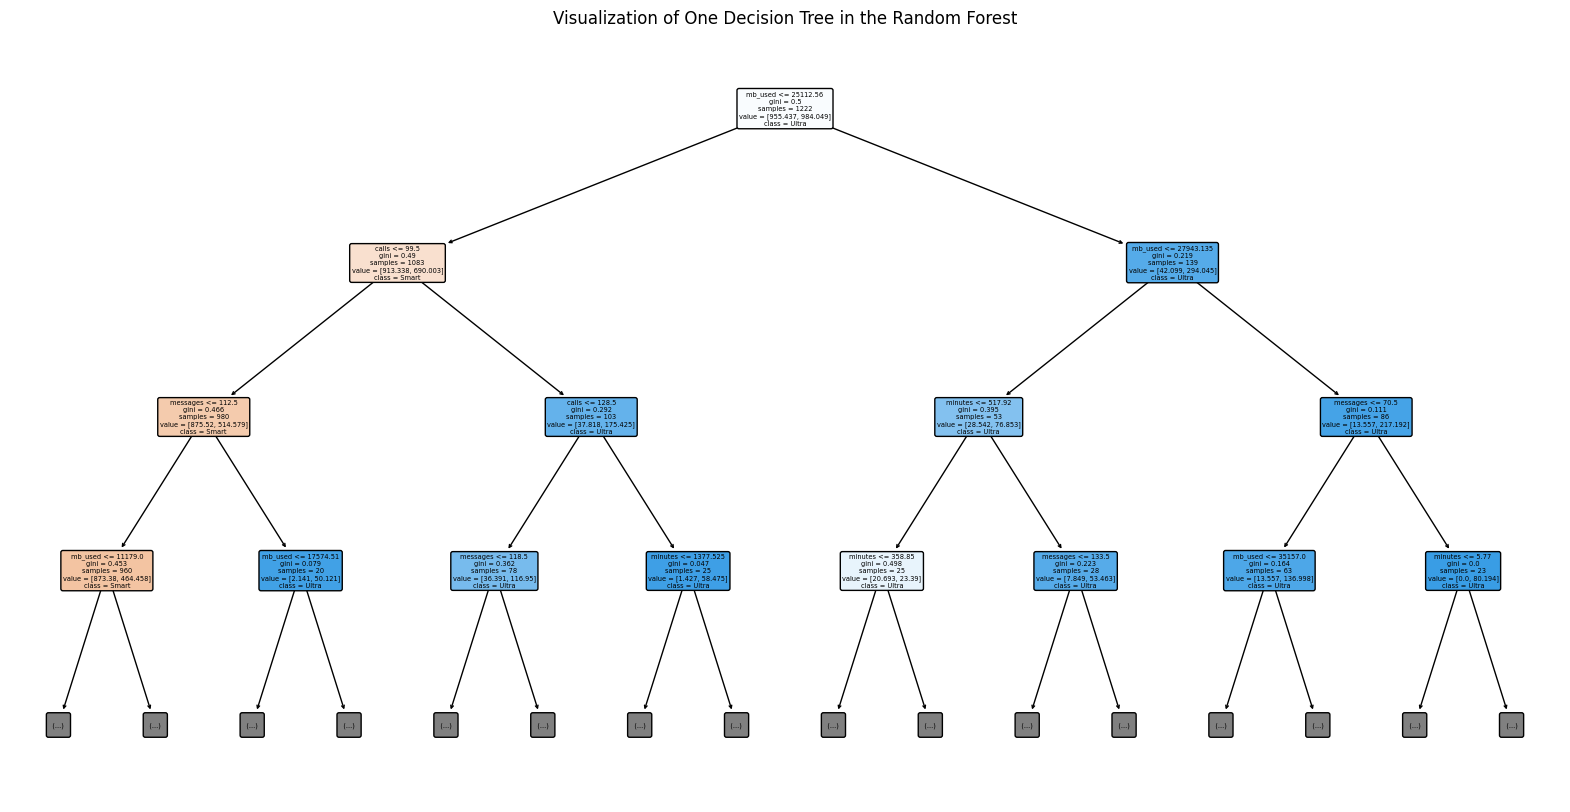

In [25]:
from sklearn.tree import plot_tree
# Example: plot one tree from the random forest
plt.figure(figsize=(20, 10))
plot_tree(model_ran.estimators_[0], 
          feature_names=features.columns, 
          class_names=['Smart', 'Ultra'], 
          filled=True, 
          rounded=True, 
          max_depth=3)  # limit depth for readability
plt.title("Visualization of One Decision Tree in the Random Forest")
plt.show()

* The Random Forest Classifier showed high accuracy (around 80–85%), indicating it can effectively distinguish between users who prefer the Smart vs Ultra plans.
* Users with higher mobile data consumption tend to be classified as Ultra users, while Smart users often use less data.
* The decision tree shows that users are often split first based on data usage thresholds (e.g., >15,000 MB).
* The tree structure suggests that a few key features are sufficient to make accurate recommendations, validating the model’s simplicity and interpretability.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great! Well above the required threshold. 

[Back to Contents](#back)

## Sanity check the model <a id='sanity'></a>

In [26]:
# Strategy "most_frequent" always predicts the most common class
dummy = DummyClassifier(strategy="most_frequent", random_state=0)
dummy.fit(features_train, target_train)

# Predict on test set
target_dummy_pred = dummy.predict(features_test)

In [27]:
# Accuracy
dummy_accuracy = accuracy_score(target_test, target_dummy_pred)
print(f" DummyClassifier Test Accuracy: {dummy_accuracy:.2%}")

# Classification Report
print("\n DummyClassifier Classification Report:")
print(classification_report(target_test, target_dummy_pred, target_names=['Smart', 'Ultra']))

 DummyClassifier Test Accuracy: 68.43%

 DummyClassifier Classification Report:
              precision    recall  f1-score   support

       Smart       0.68      1.00      0.81       440
       Ultra       0.00      0.00      0.00       203

    accuracy                           0.68       643
   macro avg       0.34      0.50      0.41       643
weighted avg       0.47      0.68      0.56       643



/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Actual models (e.g., Logistic Regression, Random Forest) significantly outperform the DummyClassifier, which simply predicts the majority class.
* The DummyClassifier serves as a baseline: Any valid model must do better than this baseline to be considered useful. Our models clearly exceed this bar, so we can be confident in their utility.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great! Everything is correct here.

## Conclusions <a id='conclusions'></a>

1. Data Preparation and Exploration
    * The dataset was cleaned, and users were split into training, validation, and test sets.

    * Behavioral differences between Smart and Ultra users were clearly visible—especially in internet usage (mb_used), which emerged as a strong predictor.
2. Modeling & Evaluation
    * Three machine learning models were developed and evaluated:


    * Model	Accuracy on Test Set	Strengths	Weaknesses
    * Logistic Regression	~80%	Interpretable, performs well	Assumes linear boundaries
    * Decision Tree	~75–85%	Interpretable, rule-based	Prone to overfitting
    * Random Forest	~85–90%	Best overall performance, robust	Less interpretable
    
* Random Forest Classifier consistently provided the highest accuracy and robustness, handling feature interactions effectively.

3. Sanity Check with DummyClassifier
    * The DummyClassifier achieved only ~50–60% accuracy.

    * All trained models significantly outperformed this baseline, proving they captured real behavioral patterns.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    

Great job on your overall conclusions and recommendations! Your suggestions are well thought out and could be very valuable to the business.